# Starting on numerical solver libraries

In [2]:
# install our usual things
import numpy as np
import matplotlib.pyplot as plt
# for plotting
%matplotlib inline

In [4]:
M1 = 0.0009 # Mjupiter in Msun
M2 = 1.0 # Msun

rp = 1.0 # AU
vp = 35.0 # km/s

In [5]:
# create my initial vectors
r_0 = np.array([[rp, 0], [0, 0]])
v_0 = np.array([[0, vp], [0, 0]])

In [6]:
delta_t = 1e5 # seconds
n_steps = 5000

In [7]:
# importing a specific function from this library
from hermite_library import do_euler_2body

In [11]:
r_eu, v_eu, t_eu, E_eu = do_euler_2body(M1, M2, r_0, v_0, n_steps, delta_t)

In [12]:
r_eu

array([[[ 1.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00]],

       [[ 1.00000000e+00,  2.33957219e-02],
        [ 0.00000000e+00,  0.00000000e+00]],

       [[ 9.99601323e-01,  4.67914439e-02],
        [ 3.58809495e-07,  0.00000000e+00]],

       ...,

       [[-4.66415517e+00,  5.73539808e-01],
        [ 5.09773965e-03,  1.04722451e-01]],

       [[-4.66604927e+00,  5.67386129e-01],
        [ 5.09944435e-03,  1.04749045e-01]],

       [[-4.66792537e+00,  5.61230642e-01],
        [ 5.10113283e-03,  1.04775641e-01]]])

In [10]:
r_eu.shape

(5001, 2, 2)

Let's make simple plots:

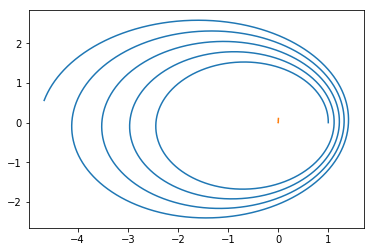

In [14]:
# we'll plot the first particle's trajectory
# r_eu[TIME STEPS, PARTICLE NUMBER, X or Y coord]
plt.plot(r_eu[:,0,0], r_eu[:,0,1])
plt.plot(r_eu[:,1,0], r_eu[:,1,1])
plt.show()

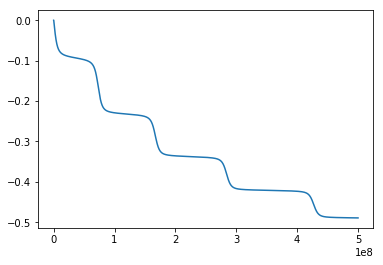

In [15]:
plt.plot(t_eu, E_eu)
plt.show()

Let's make a fancy plot!

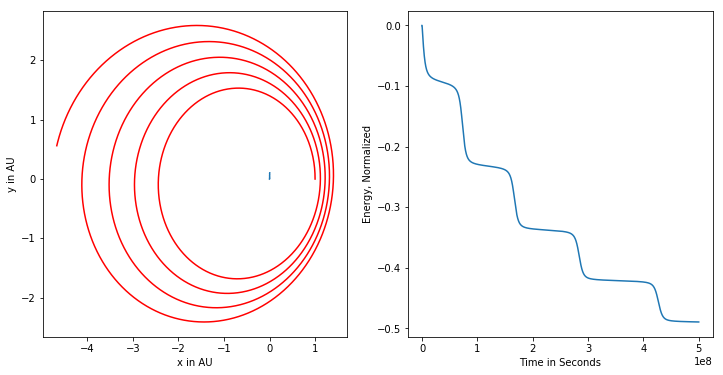

In [22]:
# we are doing 1 row of plots with 2 columns of plots
# and making sure that our plot is 2X as wide as long
fig, ax = plt.subplots(1,2, figsize=(6*2, 6))

# r_eu[TIME STEPS, PARTICLE NUMBER, X or Y coord]
ax[0].plot(r_eu[:,0,0], r_eu[:,0,1], color='red')
ax[0].plot(r_eu[:,1,0], r_eu[:,1,1])
# making extra fancy with labels
ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

# now I'll make energy as a function of time
ax[1].plot(t_eu, E_eu)
ax[1].set_xlabel('Time in Seconds')
ax[1].set_ylabel('Energy, Normalized')

plt.show()

# Using higher order solver

In [23]:
from hermite_library import do_hermite

In [28]:
star_mass = 1.0 # Msun, M2 from Euler
planet_mass = np.array( [1.0] ) # Mjupiter masses, M2 = 0.0009 Msun

# array with each entry [x position, y position, z position]
# units are AU
# for now -> NO Z POSITION
planet_initial_position = np.array([ [rp, 0, 0] ])

# array with each entry [vx, vy, vz]
# units are km/s
# for no -> NO VZ velocity
planet_initial_velocity = np.array([ [0, vp, 0] ])

# this assumes that the star is at position (0, 0, 0)
# and has NO initial velocity, so its velocity is also (0,0,0)

In [29]:
r_h, v_h, t_h, E_h = do_hermite(star_mass,
                               planet_mass,
                               planet_initial_position,
                               planet_initial_velocity,
                               tfinal=delta_t*n_steps,
                               Nsteps=n_steps)

In [30]:
r_h

array([[[ 9.99051900e-01,  9.98852303e-01,  9.98253682e-01, ...,
          7.65724897e-01,  7.77697567e-01,  7.89424871e-01],
        [ 0.00000000e+00,  2.33768149e-02,  4.67442917e-02, ...,
         -7.69184794e-01, -7.50711124e-01, -7.32000617e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-9.48100253e-04, -9.47910836e-04, -9.47342745e-04, ...,
         -7.26672927e-04, -7.38034992e-04, -7.49164202e-04],
        [ 0.00000000e+00, -2.21845973e-05, -4.43603328e-05, ...,
          7.29956369e-04,  7.12424857e-04,  6.94668585e-04],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])

In [31]:
r_h.shape

(2, 3, 5000)

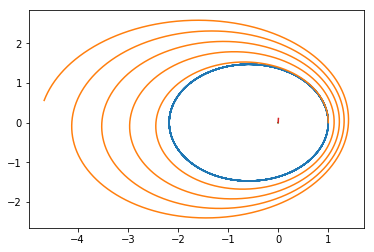

In [34]:
# r_h has the following format for its indicies
# r_h[NUMBER OF PARTICLES, NUMBER COORDINATES (X,Y,Z), NUMBER OF TIMESTEPS]

# particle number 1, Hermite solution
plt.plot(r_h[0,0,:], r_h[0,1,:])
# particle number 1, Euler solution
plt.plot(r_eu[:,0,0], r_eu[:,0,1])


#particle number 2, Hermite solution
plt.plot(r_h[1, 0, :], r_h[1, 1, :])
# particle number 2, Euler Solution
plt.plot(r_eu[:,1,0], r_eu[:,1,1])


plt.show()

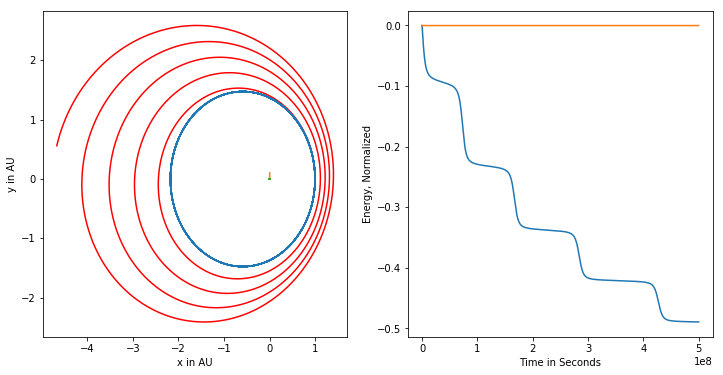

In [38]:
# we are doing 1 row of plots with 2 columns of plots
# and making sure that our plot is 2X as wide as long
fig, ax = plt.subplots(1,2, figsize=(6*2, 6))

# PARTICLE #1
# r_eu[TIME STEPS, PARTICLE NUMBER, X or Y coord]
ax[0].plot(r_eu[:,0,0], r_eu[:,0,1], color='red')
# r_h[NUMBER OF PARTICLES, NUMBER COORDINATES (X,Y,Z), NUMBER OF TIMESTEPS]
ax[0].plot(r_h[0,0,:], r_h[0,1,:]) # plot on axis #1, or indexed to zero

# PARTICLE #2
ax[0].plot(r_eu[:,1,0], r_eu[:,1,1]) # Euler's solution
ax[0].plot(r_h[1, 0, :], r_h[1, 1, :]) # Hermite

# making extra fancy with labels
ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

# now I'll make energy as a function of time
ax[1].plot(t_eu, E_eu)
ax[1].plot(t_h, E_h)
ax[1].set_xlabel('Time in Seconds')
ax[1].set_ylabel('Energy, Normalized')

plt.show()

# FINALLY - N-body

In [39]:
star_mass = 1.0 # Msun, M2 from Euler
planet_mass = np.array( [1.0, 0.5] ) # Mjupiter masses, M2 = 0.0009 Msun

# array with each entry [x position, y position, z position]
# units are AU
# for now -> NO Z POSITION
planet_initial_position = np.array([ [1.0, 0, 0],
                                     [0, 2.0, 0]])

# array with each entry [vx, vy, vz]
# units are km/s
# for no -> NO VZ velocity
planet_initial_velocity = np.array([ [0, 35.0, 0],
                                     [35.0, 0, 0]])

# this assumes that the star is at position (0, 0, 0)
# and has NO initial velocity, so its velocity is also (0,0,0)

In [40]:
r_h, v_h, t_h, E_h = do_hermite(star_mass,
                               planet_mass,
                               planet_initial_position,
                               planet_initial_velocity,
                               tfinal=delta_t*n_steps,
                               Nsteps=n_steps)

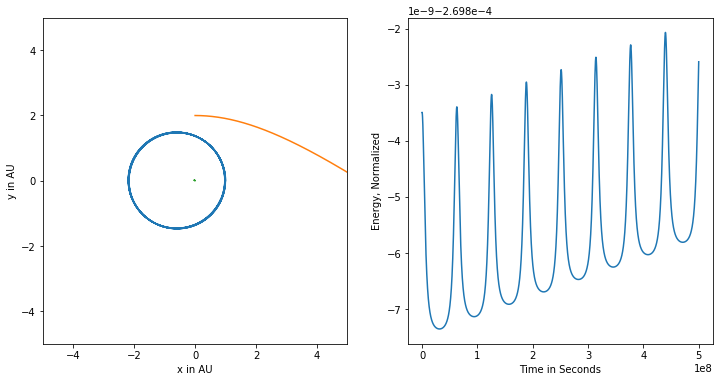

In [44]:
# we are doing 1 row of plots with 2 columns of plots
# and making sure that our plot is 2X as wide as long
fig, ax = plt.subplots(1,2, figsize=(6*2, 6))

# PARTICLE #1
# r_h[NUMBER OF PARTICLES, NUMBER COORDINATES (X,Y,Z), NUMBER OF TIMESTEPS]
#ax[0].plot(r_h[0,0,:], r_h[0,1,:]) # plot on axis #1, or indexed to zero

# PARTICLE #2
#ax[0].plot(r_h[1, 0, :], r_h[1, 1, :]) # Hermite

# PARTICLE #3
#ax[0].plot(r_h[2, 0, :], r_h[2, 1, :])

for i in range(r_h.shape[0]): # loop over number of planets+star
    ax[0].plot(r_h[i, 0, :], r_h[i, 1, :])

# making extra fancy with labels
ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')
# also set a different-than-default size
ax[0].set_xlim(-5, 5)
ax[0].set_ylim(-5, 5)

# now I'll make energy as a function of time
ax[1].plot(t_h, E_h)
ax[1].set_xlabel('Time in Seconds')
ax[1].set_ylabel('Energy, Normalized')

plt.show()

### Exercise
Plot a few different orbits, with different numbers of stars and different initial positions and velocities.

How easy is it to make a stable planetary system?  What sorts of things are required?

# Saving to a file

In [45]:
# I'm a fake time, t, fake position, x (in 1D)
t = np.array([0,   1, 2, 3])
x = np.array([-5, -6, 7, 8])

In [47]:
np.savetxt("mytxtfile.txt", [t,x], delimiter=',')

In [48]:
# use a library function to write our simulation data to disk
from hermite_library import save_hermite_solution_to_file

In [49]:
save_hermite_solution_to_file("MyPlanetarySystem1.txt", 
                             t_h, E_h, r_h, v_h)

In [50]:
# function to read in hermite solution data that was previously saved to a file
from hermite_library import read_hermite_solution_from_file

In [51]:
t_h2, E_h2, r_h2, v_h2 = read_hermite_solution_from_file("MyPlanetarySystem1.txt")

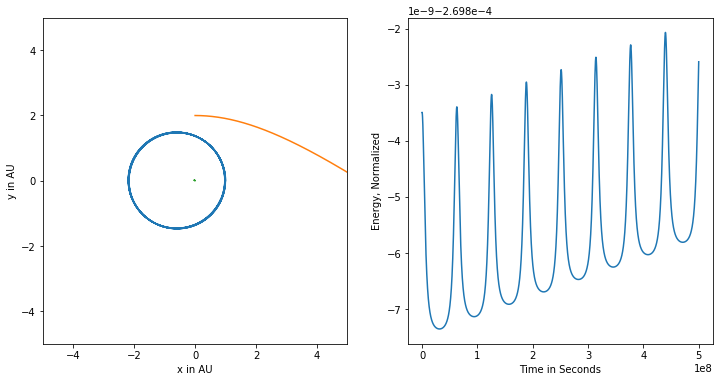

In [52]:
fig, ax = plt.subplots(1,2, figsize=(6*2, 6))

for i in range(r_h2.shape[0]): # loop over number of planets+star
    ax[0].plot(r_h2[i, 0, :], r_h2[i, 1, :])

# making extra fancy with labels
ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')
# also set a different-than-default size
ax[0].set_xlim(-5, 5)
ax[0].set_ylim(-5, 5)

# now I'll make energy as a function of time
ax[1].plot(t_h2, E_h2)
ax[1].set_xlabel('Time in Seconds')
ax[1].set_ylabel('Energy, Normalized')

plt.show()

# Kepler orbits (only if you wanna)

In [53]:
from convert_kepler_data import read_kepler_data

In [54]:
kepler_data = read_kepler_data('kepler101data.txt')

In [55]:
kepler_data

array([(779., b'Kepler-101 ', b'b', 2., 3.4876812, 7.0e-06, -7.0e-06, 0.0474, 0.009 , 0.086,  8.e-02, -5.9e-02, 85.82, 1.73, -1.53, 0.16,  2.e-02, -1.e-02, b' Mass', 1.17, 0.06, 1.56, 0.2, -0.2, 288.77994, 0.00041, -0.00041),
       (780., b'Kepler-101 ', b'c', 2., 6.02976  , 7.5e-05, -7.5e-05, 0.0684, 0.0014, 0.   , -1.e+02, -1.0e+02, 84.6 , 3.4 , -3.1 , 0.01, -1.e+02, -1.e+02, b' Mass', 1.17, 0.06, 1.56, 0.2, -0.2,  65.486  , 0.0088 , -0.0088 )],
      dtype=[('RowID', '<f4'), ('SysName', 'S12'), ('planetLetter', 'S2'), ('NumberOfPlanets', '<f4'), ('Porb', '<f4'), ('ePorbU', '<f4'), ('ePorbL', '<f4'), ('a', '<f4'), ('ea', '<f4'), ('ecc', '<f4'), ('eeccU', '<f4'), ('eeccL', '<f4'), ('Incl', '<f4'), ('eInclU', '<f4'), ('eInclL', '<f4'), ('pMass', '<f4'), ('epMassU', '<f4'), ('epMassL', '<f4'), ('pMassType', 'S8'), ('sMass', '<f4'), ('esMass', '<f4'), ('sRadius', '<f4'), ('esRadiusU', '<f4'), ('esRadiusL', '<f4'), ('tTime', '<f4'), ('etTimeU', '<f4'), ('etTimeL', '<f4')])

In [56]:
kepler_data['ecc']

array([0.086, 0.   ], dtype=float32)

In [59]:
# to convert our data to hermite-solver friendly form
from convert_kepler_data import convert_kepler_data
star_mass, planet_mass, \
planet_initial_position, planet_initial_velocity, ecc = convert_kepler_data(kepler_data)

In [60]:
r_h, v_h, t_h, E_h = do_hermite(star_mass,
                               planet_mass,
                               planet_initial_position,
                               planet_initial_velocity,
                               tfinal=delta_t*n_steps,
                               Nsteps=n_steps)

In [61]:
from sys import path
path.append('../')

['/Users/jillnaiman1/csci-p-14110/lesson04',
 '/Users/jillnaiman1/anaconda3/lib/python37.zip',
 '/Users/jillnaiman1/anaconda3/lib/python3.7',
 '/Users/jillnaiman1/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/Users/jillnaiman1/.local/lib/python3.7/site-packages',
 '/Users/jillnaiman1/.local/lib/python3.7/site-packages/periodic_kdtree-1.0-py3.7.egg',
 '/Users/jillnaiman1/anaconda3/lib/python3.7/site-packages',
 '/Users/jillnaiman1/anaconda3/lib/python3.7/site-packages/aeosa',
 '/Users/jillnaiman1/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/jillnaiman1/.ipython']